In [1]:
import math
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from scenedetect import detect, AdaptiveDetector, split_video_ffmpeg


VideoManager is deprecated and will be removed.


Scene 1: Start - 00:00:00.000, End - 00:00:01.168, Duration - 1.168 seconds
Scene 2: Start - 00:00:01.168, End - 00:00:04.471, Duration - 3.303 seconds
Scene 3: Start - 00:00:04.471, End - 00:00:05.906, Duration - 1.4349999999999996 seconds
Scene 4: Start - 00:00:05.906, End - 00:00:07.474, Duration - 1.5680000000000005 seconds
Scene 5: Start - 00:00:07.474, End - 00:00:08.642, Duration - 1.1679999999999993 seconds
Scene 6: Start - 00:00:08.642, End - 00:00:10.277, Duration - 1.6349999999999998 seconds
Scene 7: Start - 00:00:10.277, End - 00:00:11.645, Duration - 1.3680000000000003 seconds
Scene 8: Start - 00:00:11.645, End - 00:00:14.882, Duration - 3.237 seconds
Scene 9: Start - 00:00:14.882, End - 00:00:38.872, Duration - 23.990000000000002 seconds
Scene 10: Start - 00:00:38.872, End - 00:00:57.891, Duration - 19.019 seconds
Scene 11: Start - 00:00:57.891, End - 00:01:17.911, Duration - 20.020000000000003 seconds
Scene 12: Start - 00:01:17.911, End - 00:02:37.891, Duration - 79.9799

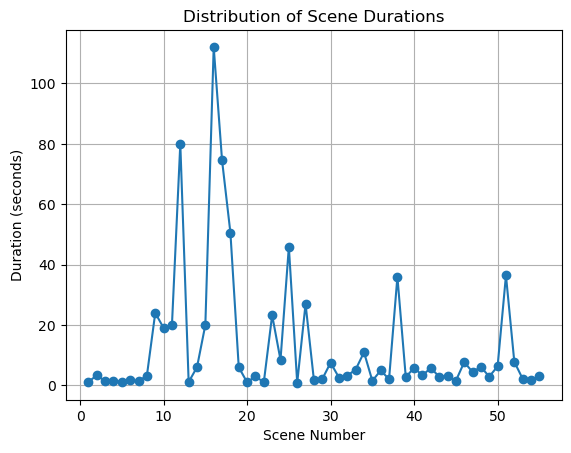

In [3]:
# Phát hiện cảnh
scene_list = detect('/home/thiendc/projects/video_summarization/data/sample_tv360/video_chunk/chunk_1.mp4', AdaptiveDetector())

# In danh sách cảnh
def timecode_to_seconds(timecode):
    time_format = "%H:%M:%S.%f"  # Bao gồm cả phần mili giây
    dt = datetime.strptime(timecode, time_format)
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1_000_000

# Danh sách lưu trữ khoảng thời gian giữa các cảnh
duration_list = []
data2csv = []
# Lặp qua danh sách cảnh và tính toán khoảng thời gian
for i, scene in enumerate(scene_list):
    scene_infos = []
    start_time = scene[0].get_timecode()
    end_time = scene[1].get_timecode()
    
    # Chuyển đổi timecode thành giây
    start_seconds = timecode_to_seconds(start_time)
    end_seconds = timecode_to_seconds(end_time)
    
    # Tính khoảng thời gian
    duration = float(end_seconds) - float(start_seconds)
    duration_list.append(duration)
    scene_infos.append(i+1)
    scene_infos.append(start_time)
    scene_infos.append(end_time)
    scene_infos.append(math.ceil(duration))
    data2csv.append(scene_infos)
    print(f"Scene {i+1}: Start - {start_time}, End - {end_time}, Duration - {duration} seconds")

# Vẽ biểu đồ đường phân phối
plt.plot(range(1, len(duration_list) + 1), duration_list, marker='o')
plt.xlabel('Scene Number')
plt.ylabel('Duration (seconds)')
plt.title('Distribution of Scene Durations')
plt.grid(True)
plt.show()


In [4]:
with open('scene_durations.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Writing the header
    writer.writerow(["Scene", "Start Time", "End Time", "Duration (seconds)"])
    # Writing the data
    writer.writerows(data2csv)